<a href="https://colab.research.google.com/github/UlaNoman/CSci127/blob/master/thermistor_vs_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving thermistor_vs_time.csv to thermistor_vs_time (1).csv


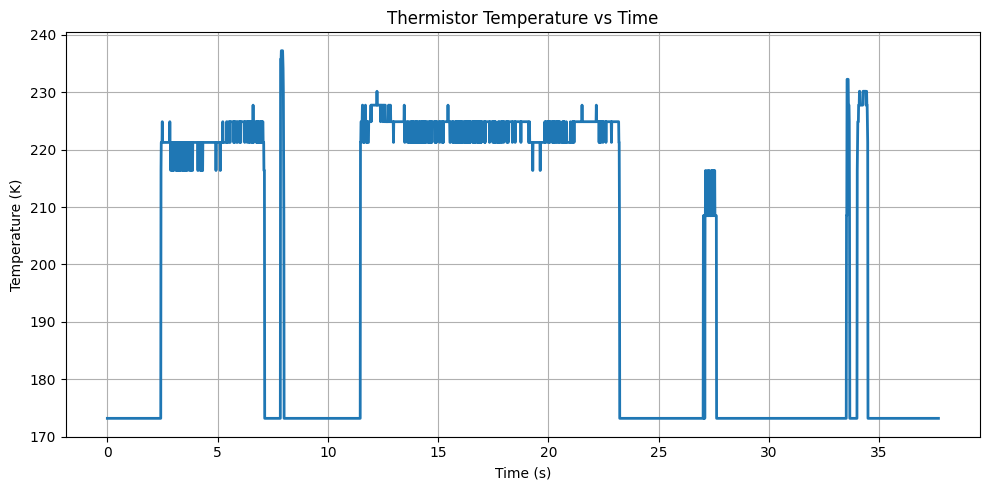

Plot saved as temperature_plot.png


In [18]:
# ---------------------------------------------
# STEP 1 — Upload your CSV file into Colab
# ---------------------------------------------
from google.colab import files
uploaded = files.upload()     # Select: thermistor_vs_time.csv


# ---------------------------------------------
# STEP 2 — Load the CSV data
# ---------------------------------------------
import pandas as pd

df = pd.read_csv("thermistor_vs_time.csv")   # Must match uploaded filename

time_ms = df["time_ms"]
adc = df["adc"]


# ---------------------------------------------
# STEP 3 — Convert ADC → Temperature (Kelvin)
# ---------------------------------------------
import numpy as np

# ADC → voltage
Vin = 5.0
Vout = Vin * (adc / 1023.0)

# avoid division error
Vout = np.clip(Vout, 0.0001, Vin - 0.0001)

# Voltage divider equation → thermistor resistance
R_fixed = 1000    # 1kΩ resistor
R_therm = R_fixed * (Vout / (Vin - Vout))

# Thermistor model NTCLE100E3332JB0
R0 = 3300        # ohms at 25°C
T0 = 298.15      # Kelvin
beta = 3977      # beta value from datasheet

# Beta equation → temperature
tempK = 1.0 / ((1.0/T0) + (1.0/beta) * np.log(R_therm / R0))

# convert time to seconds
time_s = time_ms / 1000.0


# ---------------------------------------------
# STEP 4 — Plot Temperature vs Time
# ---------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(time_s, tempK, linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Temperature (K)")
plt.title("Thermistor Temperature vs Time")
plt.grid(True)
plt.tight_layout()

# Save the plot for LaTeX
plt.savefig("temperature_plot.png", dpi=300)
plt.show()

print("Plot saved as temperature_plot.png")


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
